<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="../figures/PDSH-cover-small.png">
*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<!--NAVIGATION-->
< [Computation on NumPy Arrays: Universal Functions](02.03-Computation-on-arrays-ufuncs.ipynb) | [Contents](Index.ipynb) | [Computation on Arrays: Broadcasting](02.05-Computation-on-arrays-broadcasting.ipynb) >

# Aggregations: Min, Max, and Everything In Between

**Often when faced with a large amount of data, a first step is to compute summary statistics for the data in question.**
Perhaps **the most common summary statistics are the mean and standard deviation**, which allow you to summarize the "typical" values in a dataset, but other aggregates are useful as well (**the sum, product, median, minimum and maximum, quantiles, etc.).**

NumPy has fast built-in aggregation functions for working on arrays; we'll discuss and demonstrate some of them here.

## Summing the Values in an Array

As a quick example, consider computing the sum of all values in an array.
Python itself can do this using the built-in ``sum`` function:

In [2]:
import numpy as np

In [ ]:
L = np.random.random(100)
sum(L) # 파이썬 함수

55.61209116604941

The syntax is quite similar to that of NumPy's ``sum`` function, and the result is the same in the simplest case:

In [ ]:
np.sum(L) # 넘파이 함수

55.612091166049424

However, because it executes the operation in compiled code, NumPy's version of the operation is computed much more quickly:

In [ ]:
big_array = np.random.rand(1000000)
%timeit sum(big_array) #파이썬 함수
%timeit np.sum(big_array) #넘파이 함수

70.8 ms ± 1.91 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
699 μs ± 13.1 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Be careful, though: the ``sum`` function and the ``np.sum`` function are not identical, which can sometimes lead to confusion!
In particular, their optional arguments have different meanings, and ``np.sum`` is aware of multiple array dimensions, as we will see in the following section.

## Minimum and Maximum

Similarly, Python has built-in ``min`` and ``max`` functions, used to find the minimum value and maximum value of any given array:

In [5]:
min(big_array), max(big_array)

(1.1717128136634614e-06, 0.9999976784968716)

NumPy's corresponding functions have similar syntax, and again operate much more quickly:

In [6]:
np.min(big_array), np.max(big_array)

(1.1717128136634614e-06, 0.9999976784968716)

In [7]:
%timeit min(big_array)
%timeit np.min(big_array)

10 loops, best of 3: 82.3 ms per loop
1000 loops, best of 3: 497 µs per loop


For ``min``, ``max``, ``sum``, and several other NumPy aggregates, a shorter syntax is to use methods of the array object itself:

In [8]:
print(big_array.min(), big_array.max(), big_array.sum())

1.17171281366e-06 0.999997678497 499911.628197


Whenever possible, make sure that you are using the NumPy version of these aggregates when operating on NumPy arrays!

### Multi dimensional aggregates

**One common type of aggregation operation is an aggregate along a row or column.**
Say you have some data stored in a two-dimensional array:

In [1]:
import numpy as np

In [2]:
M = np.random.random((3, 4))
print(M)

[[0.59873554 0.60354633 0.39271024 0.95320042]
 [0.94215858 0.54906921 0.44658493 0.65763121]
 [0.84622919 0.61719477 0.89244617 0.45131647]]


By default, each NumPy aggregation function will return the aggregate over the entire array:

In [3]:
M.sum() #NumPy 배열 객체 ndarray가 가지고 있는 메서드(method)
# M.sum() 은 내부적으로 NumPy의 UFunc(reduce 연산) 을 실행

np.float64(7.950823059229608)

**Aggregation functions take an additional argument specifying the *axis* along which the aggregate is computed.** For example, we can find the minimum value within each column by specifying ``axis=0``:

In [ ]:
M.min(axis=0) #행을 따라가면서 min을 열별로 연산
# min을 구하는 데 행을 따라가면서 최소 값을 찾는다 > 각 열에 대하여 

array([0.142057  , 0.29061832, 0.06681835, 0.50499804])

The function returns four values, corresponding to the four columns of numbers.

Similarly, we can find the maximum value within each row:

In [6]:
M.max(axis=1)

array([0.61918241, 0.974442  , 0.80002049])

The way the axis is specified here can be confusing to users coming from other languages.
**The ``axis`` keyword specifies the dimension of the array that will be collapsed**, rather than the dimension that will be returned.
So **specifying ``axis=0`` means that the first axis will be collapsed**: for two-dimensional arrays, this means that values within each column will be aggregated.

### Other aggregation functions

NumPy provides many other aggregation functions, but we won't discuss them in detail here.
Additionally, most aggregates have a ``NaN``-safe counterpart that computes the result while ignoring missing values, which are marked by the special IEEE floating-point ``NaN`` value (for a fuller discussion of missing data, see [Handling Missing Data](03.04-Missing-Values.ipynb)).
Some of these ``NaN``-safe functions were not added until NumPy 1.8, so they will not be available in older NumPy versions.

The following table provides a list of useful aggregation functions available in NumPy:

|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements                      |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |

We will see these aggregates often throughout the rest of the book.

**중요 함수: armin, argmax, any, all**

## Example: What is the Average Height of US Presidents?

Aggregates available in NumPy can be extremely useful for summarizing a set of values.
As a simple example, let's consider the heights of all US presidents.
This data is available in the file *president_heights.csv*, which is a simple comma-separated list of labels and values:

글자가 깨지는 이유:

- Windows PowerShell이 한글/UTF-8 출력 인코딩을 지원하지 않는 상태이기 때문

In [4]:
%pip install pandas

  Using cached pandas-2.3.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.3.3-cp312-cp312-win_amd64.whl (11.0 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

   ---------------------------------------- 0/3 [pytz]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------------------------- 1/3 [tzdata]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pand

In [10]:
import pandas as pd
df = pd.read_csv("../data/president_heights.csv")
df.head(4)


,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163


In [11]:
%head -n 4 data/president_heights.csv
# Windows PowerShell에서는 head 명령이 없어 실패함
# (Shell Magic) + head ― 리눅스/맥/Git Bash 채널에서 잘 됨

UsageError: Line magic function `%head` not found.


We'll use the Pandas package, which we'll explore more fully in [Chapter 3](03.00-Introduction-to-Pandas.ipynb), to read the file and extract this information (note that the heights are measured in centimeters).

In [12]:
import numpy as np
import pandas as pd
data = pd.read_csv('../data/president_heights.csv')
# pd.read_csv()는 CSV 파일을 읽을 때 첫 번째 줄을 자동으로 컬럼 이름(키)로 사용
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


Now that we have this data array, we can compute a variety of summary statistics:

In [13]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:     163
Maximum height:     193


Note that in each case, the aggregation operation reduced the entire array to a single summarizing value, which gives us information about the distribution of values.
We may also wish to compute quantiles:

In [14]:
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))

25th percentile:    174.25
Median:             182.0
75th percentile:    183.0


We see that the median height of US presidents is 182 cm, or just shy of six feet.

Of course, sometimes it's more useful to see a visual representation of this data, which we can accomplish using tools in Matplotlib (we'll discuss Matplotlib more fully in [Chapter 4](04.00-Introduction-To-Matplotlib.ipynb)). For example, this code generates the following chart:

In [6]:
%pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 10.1 MB/s eta 0:00:01
   ---------- ----------------------------- 2.1/8.1 MB 4.7 MB/s eta 0:00:02
   --------------------- ------------------ 4.5/8.1 MB 7.1 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.1 MB 6.9 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 7.9 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 7.7 MB/s  0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ------------------------------------- -- 2.1/2.3 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 10.7 MB/s  0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   --

In [7]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # 플롯 스타일 설정

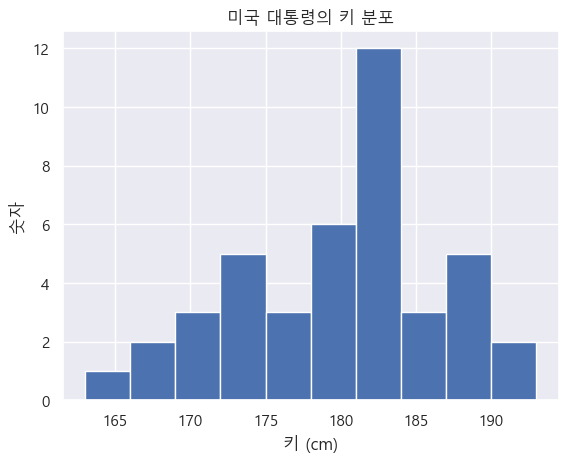

In [15]:
plt.rc('font',family='Malgun Gothic')
plt.hist(heights)
plt.title('미국 대통령의 키 분포')
plt.xlabel('키 (cm)')
plt.ylabel('숫자');

These aggregates are some of the fundamental pieces of exploratory data analysis that we'll explore in more depth in later chapters of the book.

<!--NAVIGATION-->
< [Computation on NumPy Arrays: Universal Functions](02.03-Computation-on-arrays-ufuncs.ipynb) | [Contents](Index.ipynb) | [Computation on Arrays: Broadcasting](02.05-Computation-on-arrays-broadcasting.ipynb) >